# I.Làm sạch dữ liệu

In [1]:
# import các thư viện cần thiết để xử lý dữ liệu
import pandas as pd
import numpy as np

In [2]:
# đọc dataset
df= pd.read_csv(r'C:\Users\Admin\Downloads\archive\train.csv')

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# kiểm tra thông tin của dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
# loại bỏ những cột không cần thiết
df= df.drop(['ID','Name','Month','SSN','Type_of_Loan','Credit_History_Age'],axis =1 )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [5]:
# phân loại các dữ liệu  dạng số và dữ liệu dạng category
# dữ liệu dạng số
df_numerical = df[['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']]

# kiểm tra tổng số cột trong dữ liệu số
len(df_numerical.columns)


16

In [6]:
# dữ liệu dạng chữ
df_categorical = df.drop( axis =1 , columns = df_numerical.columns)

# kiểm tra tổng số cột trong dữ liệu dạng chữ
len(df_categorical.columns)

6

In [7]:
# kết hợp 2 bảng lại thành 1 bảng data mới
df_new = pd.concat([df_numerical, df_categorical], axis=1)
df_new.shape

(100000, 22)

In [8]:
#kiểm tra duplicate
df_new.drop_duplicates( inplace = True)
df_new.shape

(100000, 22)

=> không có dữ liệu nào bị trùng

In [9]:
# tìm kiếm những giá trị lạ, bất thường trong dataset
df_new.describe(exclude=np.number).T
# => qua đây ta có thể thấy dấu "_" xuất hiên khá nhiều trong những cột numerical


,count,unique,top,freq
Age,100000,1788,38,2833
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Num_of_Delayed_Payment,92998,749,19,5327
Changed_Credit_Limit,100000,4384,_,2091
Outstanding_Debt,100000,13178,1360.45,24
Amount_invested_monthly,95521,91049,__10000__,4305
Monthly_Balance,98800,98792,__-333333333333333333333333333__,9
Customer_ID,100000,12500,CUS_0xd40,8
Occupation,100000,16,_______,7062


In [10]:
# tiến hành thay thế dấu "_" bằng "" và thay bằng mp.nan nếu cả dữ liệu là ""
df_new=df_new.replace('_','', regex = True).replace('',np.nan, regex = False)


In [11]:
# tiến hành thay số âm bằng np.nan
df_new = df_new.replace('-',np.nan, regex = True)


In [12]:
# kiểm tra lại dữ liệu
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       99114 non-null   object 
 1   Annual_Income             100000 non-null  object 
 2   Monthly_Inhand_Salary     84998 non-null   float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               96124 non-null   object 
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    92354 non-null   object 
 9   Changed_Credit_Limit      96323 non-null   object 
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Outstanding_Debt          100000 non-null  object 
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Total_EMI_per_month       100000 non-null  fl

In [13]:
# xem 10 dòng đầu của dữ liệu
df_new.head(10)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,26.822620,49.574949,80.41529543900253,312.49408867943663,CUS0xd40,Scientist,NaN,No,HighspentSmallvaluepayments,Good
1,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,...,31.944960,49.574949,118.28022162236736,284.62916249607184,CUS0xd40,Scientist,Good,No,LowspentLargevaluepayments,Good
2,NaN,19114.12,NaN,3,4,3,4,3,7,NaN,...,28.609352,49.574949,81.699521264648,331.2098628537912,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23,19114.12,NaN,3,4,3,4,5,4,6.27,...,31.377862,49.574949,199.4580743910713,223.45130972736786,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,...,24.797347,49.574949,41.420153086217326,341.48923103222177,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23,19114.12,NaN,3,4,3,4,8,4,9.27,...,27.262259,49.574949,62.430172331195294,340.4792117872438,CUS0xd40,Scientist,Good,No,!@9#%8,Good
6,23,19114.12,1824.843333,3,4,3,4,3,8,11.27,...,22.537593,49.574949,178.3440674122349,244.5653167062043,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
7,23,19114.12,1824.843333,3,4,3,4,3,6,11.27,...,23.933795,49.574949,24.785216509052056,358.12416760938714,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Standard
8,28,34847.84,3037.986667,2,4,6,1,3,4,5.42,...,24.464031,18.816215,104.291825168246,470.69062692529184,CUS0x21b1,NaN,Good,No,LowspentSmallvaluepayments,Standard
9,28,34847.84,3037.986667,2,4,6,1,7,1,7.42,...,38.550848,18.816215,40.39123782853101,484.5912142650067,CUS0x21b1,Teacher,Good,No,HighspentLargevaluepayments,Good


In [14]:
# chuyển đổi kiểu dữ liệu thành dạng int
i=['Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Delay_from_due_date']
for k in i:
    print('k= ', k )
    df_new[k]=df_new[k].astype('int64')   

k=  Num_Bank_Accounts
k=  Num_Credit_Card
k=  Interest_Rate
k=  Delay_from_due_date


In [15]:
# chuyển đổi kiểu dữ liệu thành dạng float
i=['Age','Num_of_Loan','Annual_Income','Monthly_Inhand_Salary','Num_of_Delayed_Payment',
   'Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt',
   'Amount_invested_monthly','Monthly_Balance']
for k in i:
    print('k= ', k )
    df_new[k]=df_new[k].astype('float')   

k=  Age
k=  Num_of_Loan
k=  Annual_Income
k=  Monthly_Inhand_Salary
k=  Num_of_Delayed_Payment
k=  Changed_Credit_Limit
k=  Num_Credit_Inquiries
k=  Outstanding_Debt
k=  Amount_invested_monthly
k=  Monthly_Balance


In [16]:
# chuyển dữ liệu thành dang category
i=['Customer_ID','Occupation','Credit_Mix','Payment_of_Min_Amount',
   'Payment_Behaviour','Credit_Score']
for k in i:
    print('k= ', k )
    df_new[k]=df_new[k].astype('category')   


k=  Customer_ID
k=  Occupation
k=  Credit_Mix
k=  Payment_of_Min_Amount
k=  Payment_Behaviour
k=  Credit_Score


In [17]:
# kiem tra lại xem đã chuyển iểu dữ liệu thành công chưa
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Age                       99114 non-null   float64 
 1   Annual_Income             100000 non-null  float64 
 2   Monthly_Inhand_Salary     84998 non-null   float64 
 3   Num_Bank_Accounts         100000 non-null  int64   
 4   Num_Credit_Card           100000 non-null  int64   
 5   Interest_Rate             100000 non-null  int64   
 6   Num_of_Loan               96124 non-null   float64 
 7   Delay_from_due_date       100000 non-null  int64   
 8   Num_of_Delayed_Payment    92354 non-null   float64 
 9   Changed_Credit_Limit      96323 non-null   float64 
 10  Num_Credit_Inquiries      98035 non-null   float64 
 11  Outstanding_Debt          100000 non-null  float64 
 12  Credit_Utilization_Ratio  100000 non-null  float64 
 13  Total_EMI_per_month       1000

In [18]:
# xóa dữ liệu âm trong bảng dữ liệu
i = df_new.iloc[:,0:16]
for k in (i):
    del_neg = df_new.index[df_new[k] < 0 ].tolist()
    df_new= df_new.drop(index = del_neg )

df_new.head() 

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,26.822620,49.574949,80.415295,312.494089,CUS0xd40,Scientist,NaN,No,HighspentSmallvaluepayments,Good
2,NaN,19114.12,NaN,3,4,3,4.0,3,7.0,NaN,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23.0,19114.12,NaN,3,4,3,4.0,5,4.0,6.27,...,31.377862,49.574949,199.458074,223.451310,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,NaN,11.27,...,24.797347,49.574949,41.420153,341.489231,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23.0,19114.12,NaN,3,4,3,4.0,8,4.0,9.27,...,27.262259,49.574949,62.430172,340.479212,CUS0xd40,Scientist,Good,No,!@9#%8,Good


In [19]:
# tìm các cột có dữ liệu null
sum_null = pd.DataFrame(df_new.isnull().sum())
sum_null[sum_null[0] > 0]
 # => có 10 cột bi null cần phải xử lý

,0
Age,881
Monthly_Inhand_Salary,14906
Num_of_Loan,3843
Num_of_Delayed_Payment,7598
Changed_Credit_Limit,3649
Num_Credit_Inquiries,1951
Amount_invested_monthly,4455
Monthly_Balance,1201
Occupation,7007
Credit_Mix,20079


In [21]:
# tạo một dictionary theo mode của customer để thay thế những
# dữ liệu categorical
dictionary_mode = df_new.groupby('Customer_ID')['Occupation'].agg(pd.Series.mode).reset_index()
dictionary_mode

,Customer_ID,Occupation
0,CUS0x1000,Lawyer
1,CUS0x1009,Mechanic
2,CUS0x100b,MediaManager
3,CUS0x1011,Doctor
4,CUS0x1013,Mechanic
...,...,...
12495,CUS0xff3,Scientist
12496,CUS0xff4,Entrepreneur
12497,CUS0xff6,Doctor
12498,CUS0xffc,Musician


In [22]:
# tạo một dictionary theo mode của customer để thay thế 
# những dữ liệu categorical
dictionary_mode1 = df_new.groupby('Customer_ID')['Credit_Mix'].apply(pd.Series.mode).reset_index()
dictionary_mode1

,Customer_ID,level_1,Credit_Mix
0,CUS0x1000,0,Bad
1,CUS0x1009,0,Standard
2,CUS0x100b,0,Good
3,CUS0x1011,0,Standard
4,CUS0x1013,0,Good
...,...,...,...
12494,CUS0xff3,0,Good
12495,CUS0xff4,0,Standard
12496,CUS0xff6,0,Good
12497,CUS0xffc,0,Bad


In [23]:
# tạo một dictionary theo dữ liệu median của customer để thay thế cho những dữ liệu numerical
dictionary_median = df_new.groupby(['Customer_ID']).median().reset_index()
dictionary_median = round (dictionary_median)
dictionary_median

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,CUS0x1000,17.0,30626.0,2706.0,6.0,5.0,27.0,2.0,62.0,25.0,2.0,11.0,1563.0,33.0,43.0,145.0,340.0
1,CUS0x1009,26.0,52313.0,4250.0,6.0,5.0,17.0,4.0,8.0,18.0,10.0,3.0,203.0,29.0,108.0,153.0,418.0
2,CUS0x100b,18.0,113781.0,9550.0,1.0,4.0,1.0,0.0,14.0,7.0,11.0,1.0,1030.0,34.0,0.0,617.0,824.0
3,CUS0x1011,44.0,58918.0,5209.0,3.0,3.0,17.0,3.0,27.0,15.0,14.0,7.0,473.0,28.0,123.0,414.0,264.0
4,CUS0x1013,44.0,98621.0,7962.0,3.0,3.0,6.0,3.0,12.0,9.0,1.0,3.0,1234.0,31.0,228.0,320.0,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,CUS0xff3,55.0,17033.0,1176.0,0.0,6.0,2.0,3.0,13.0,9.0,7.0,5.0,1229.0,34.0,33.0,83.0,281.0
12496,CUS0xff4,37.0,25546.0,2416.0,8.0,7.0,14.0,5.0,16.0,13.0,8.0,5.0,758.0,32.0,101.0,111.0,303.0
12497,CUS0xff6,18.0,117640.0,9727.0,5.0,6.0,1.0,2.0,1.0,4.0,10.0,2.0,338.0,33.0,127.0,749.0,735.0
12498,CUS0xffc,17.0,60877.0,5218.0,6.0,8.0,27.0,8.0,46.0,16.0,9.0,13.0,1300.0,36.0,273.0,162.0,340.0


In [24]:
# thấy thế missing value cho cột Age bằng phương pháp ánh xạ

# tìm kiếm vị trí của dữ liệu null
Age_null=df_new.index[df_new['Age'].isnull()].tolist()
df_new.loc[Age_null,]


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
2,NaN,19114.120,NaN,3,4,3,4.0,3,7.0,NaN,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
113,NaN,25546.260,NaN,8,7,14,5.0,16,13.0,7.83,...,29.711376,101.328637,300.323232,129.933631,CUS0xff4,Entrepreneur,Standard,Yes,LowspentSmallvaluepayments,Standard
289,NaN,29469.980,2227.831667,7,7,24,5.0,50,18.0,22.94,...,30.268411,69.685459,125.491768,287.605940,CUS0x4080,Mechanic,Bad,NM,HighspentSmallvaluepayments,Standard
340,NaN,20574.470,1740.539167,6,1327,14,4.0,6,7.0,13.74,...,29.036164,49.348666,139.978562,254.726688,CUS0x9bc1,Architect,Standard,Yes,LowspentLargevaluepayments,Standard
560,NaN,144546.720,11809.560000,0,3,7,2.0,15,7.0,6.08,...,40.840687,136.988557,573.411590,730.555853,CUS0x2827,Scientist,Good,No,HighspentSmallvaluepayments,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99531,NaN,8974.555,NaN,10,8,28,7.0,21,24.0,8.87,...,22.173985,30.443262,27.838227,300.106469,CUS0x85dd,Lawyer,Bad,Yes,LowspentMediumvaluepayments,Poor
99541,NaN,34671.150,2637.262500,4,3,16,2.0,21,19.0,11.27,...,25.076571,52.337589,104.783142,366.605518,CUS0xc22f,Scientist,Standard,Yes,HighspentSmallvaluepayments,Standard
99762,NaN,17818.600,1659.883333,4,6,14,1.0,25,15.0,10.91,...,26.398987,11.581102,34.980327,369.426905,CUS0x1b07,Accountant,Standard,NM,HighspentMediumvaluepayments,Standard
99937,NaN,22620.790,1722.065833,7,3,9,0.0,25,NaN,5.31,...,31.841872,0.000000,105.076293,337.130290,CUS0xad4f,NaN,Standard,No,LowspentLargevaluepayments,Standard


In [25]:
# tạo dictionary để ánh xạ
dict_Age = dict (zip(dictionary_median['Customer_ID'],dictionary_median['Age']))

In [26]:
# fill dữ liệu NA #check hỏi lai giàu
df_new['Age']=df_new['Age'].fillna(df_new['Customer_ID'].map(dict_Age))

In [27]:
# kiểm tra lại sau khi đã fill null
df_new.loc[Age_null,]

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
2,23.0,19114.120,NaN,3,4,3,4.0,3,7.0,NaN,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
113,37.0,25546.260,NaN,8,7,14,5.0,16,13.0,7.83,...,29.711376,101.328637,300.323232,129.933631,CUS0xff4,Entrepreneur,Standard,Yes,LowspentSmallvaluepayments,Standard
289,16.0,29469.980,2227.831667,7,7,24,5.0,50,18.0,22.94,...,30.268411,69.685459,125.491768,287.605940,CUS0x4080,Mechanic,Bad,NM,HighspentSmallvaluepayments,Standard
340,42.0,20574.470,1740.539167,6,1327,14,4.0,6,7.0,13.74,...,29.036164,49.348666,139.978562,254.726688,CUS0x9bc1,Architect,Standard,Yes,LowspentLargevaluepayments,Standard
560,18.0,144546.720,11809.560000,0,3,7,2.0,15,7.0,6.08,...,40.840687,136.988557,573.411590,730.555853,CUS0x2827,Scientist,Good,No,HighspentSmallvaluepayments,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99531,45.0,8974.555,NaN,10,8,28,7.0,21,24.0,8.87,...,22.173985,30.443262,27.838227,300.106469,CUS0x85dd,Lawyer,Bad,Yes,LowspentMediumvaluepayments,Poor
99541,34.0,34671.150,2637.262500,4,3,16,2.0,21,19.0,11.27,...,25.076571,52.337589,104.783142,366.605518,CUS0xc22f,Scientist,Standard,Yes,HighspentSmallvaluepayments,Standard
99762,35.0,17818.600,1659.883333,4,6,14,1.0,25,15.0,10.91,...,26.398987,11.581102,34.980327,369.426905,CUS0x1b07,Accountant,Standard,NM,HighspentMediumvaluepayments,Standard
99937,47.0,22620.790,1722.065833,7,3,9,0.0,25,NaN,5.31,...,31.841872,0.000000,105.076293,337.130290,CUS0xad4f,NaN,Standard,No,LowspentLargevaluepayments,Standard


In [28]:
# làm tương tư cho 11 cột numerical còn lại
i = ['Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan','Delay_from_due_date'
     ,'Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Total_EMI_per_month'
         ,'Amount_invested_monthly','Monthly_Balance']
for k in i:
    # tạo ditionary
    dict_k = dict(zip(dictionary_median['Customer_ID'],dictionary_median[k]))

    # fill dữ liệu NA
    df_new[k] = df_new[k].fillna(df_new['Customer_ID'].map(dict_k)) 

In [29]:
# kiểm tra ai dữ liệu
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99388 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       99388 non-null  float64 
 1   Annual_Income             99388 non-null  float64 
 2   Monthly_Inhand_Salary     99388 non-null  float64 
 3   Num_Bank_Accounts         99388 non-null  int64   
 4   Num_Credit_Card           99388 non-null  int64   
 5   Interest_Rate             99388 non-null  int64   
 6   Num_of_Loan               99388 non-null  float64 
 7   Delay_from_due_date       99388 non-null  int64   
 8   Num_of_Delayed_Payment    99388 non-null  float64 
 9   Changed_Credit_Limit      99388 non-null  float64 
 10  Num_Credit_Inquiries      99388 non-null  float64 
 11  Outstanding_Debt          99388 non-null  float64 
 12  Credit_Utilization_Ratio  99388 non-null  float64 
 13  Total_EMI_per_month       99388 non-null  floa

In [30]:
# vì occupation là categorical value nên sẽ dùng dict_mode thay vì dict_median
dict_occu = dict(zip(dictionary_mode['Customer_ID'],dictionary_mode['Occupation']))
df_new['Occupation'] = df_new['Occupation'].fillna(df_new['Customer_ID'].map(dict_occu)) 
df_new.info()                                     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99388 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       99388 non-null  float64 
 1   Annual_Income             99388 non-null  float64 
 2   Monthly_Inhand_Salary     99388 non-null  float64 
 3   Num_Bank_Accounts         99388 non-null  int64   
 4   Num_Credit_Card           99388 non-null  int64   
 5   Interest_Rate             99388 non-null  int64   
 6   Num_of_Loan               99388 non-null  float64 
 7   Delay_from_due_date       99388 non-null  int64   
 8   Num_of_Delayed_Payment    99388 non-null  float64 
 9   Changed_Credit_Limit      99388 non-null  float64 
 10  Num_Credit_Inquiries      99388 non-null  float64 
 11  Outstanding_Debt          99388 non-null  float64 
 12  Credit_Utilization_Ratio  99388 non-null  float64 
 13  Total_EMI_per_month       99388 non-null  floa

In [31]:
# vì credit_mix là categorical value nên sẽ dùng dict_mode thay vì dict_median
dict_CM = dict(zip(dictionary_mode1['Customer_ID'],dictionary_mode1['Credit_Mix']))
df_new['Credit_Mix'] = df_new['Credit_Mix'].fillna(df_new['Customer_ID'].map(dict_CM)) 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99388 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       99388 non-null  float64 
 1   Annual_Income             99388 non-null  float64 
 2   Monthly_Inhand_Salary     99388 non-null  float64 
 3   Num_Bank_Accounts         99388 non-null  int64   
 4   Num_Credit_Card           99388 non-null  int64   
 5   Interest_Rate             99388 non-null  int64   
 6   Num_of_Loan               99388 non-null  float64 
 7   Delay_from_due_date       99388 non-null  int64   
 8   Num_of_Delayed_Payment    99388 non-null  float64 
 9   Changed_Credit_Limit      99388 non-null  float64 
 10  Num_Credit_Inquiries      99388 non-null  float64 
 11  Outstanding_Debt          99388 non-null  float64 
 12  Credit_Utilization_Ratio  99388 non-null  float64 
 13  Total_EMI_per_month       99388 non-null  floa

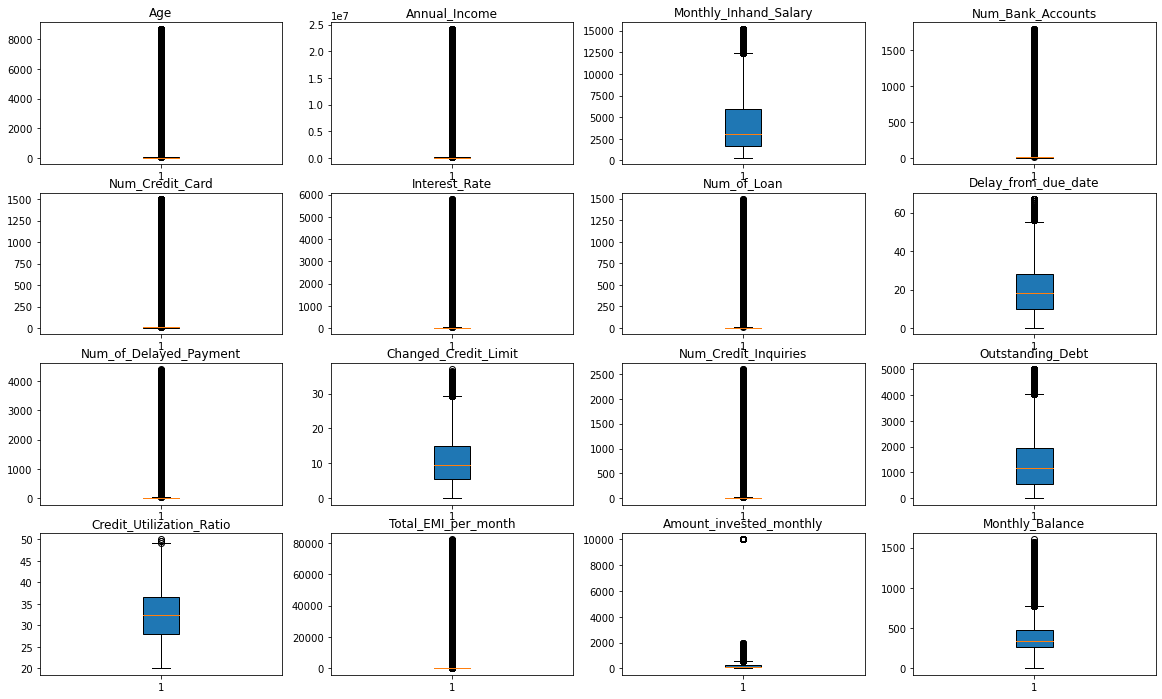

In [32]:
# vẽ botplot để xác định outliner 
import matplotlib.pyplot as plt
nrows = 4
ncols = 4
# vẽ nhiều hình với tỉ lệ 4,4
fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,12), sharex = False , sharey = False)

# lấy dữ liệu của các cột numerical ( 0 tới 15)
numerical_column = df_new.iloc[:,0:16].columns
k=0
for i in range(nrows):
    for j in range(ncols):
            axs[i][j].boxplot(df_new[numerical_column[k]], notch= False, vert= True, patch_artist=True)
            axs[i][j].set_title(numerical_column[k])
            k = k+1


Ban đầu, ta có hể thấy có rất nhiều Outliner nằm trải dài trên nhiều biến, nếu không loại bỏ sẽ gây nhiễu cho model

In [33]:
# Xóa outliner bằng cách tính tứ phân vị
# xóa outliner lần 0 cho 16 cột
for k in numerical_column:
    Q1 = df_new[k].quantile(0.25)
    Q3 = df_new[k].quantile(0.75)
    IQR = Q3- Q1
    df_new = df_new.drop(df_new.loc[df_new[k] >  (Q3 + 1.5 * IQR )].index)
    df_new = df_new.drop(df_new.loc[df_new[k] <  (Q1 - 1.5 * IQR )].index)
df_new

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,26.822620,49.574949,80.415295,312.494089,CUS0xd40,Scientist,Good,No,HighspentSmallvaluepayments,Good
2,23.0,19114.12,1825.000000,3,4,3,4.0,3,7.0,11.00,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23.0,19114.12,1825.000000,3,4,3,4.0,5,4.0,6.27,...,31.377862,49.574949,199.458074,223.451310,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,6.0,11.27,...,24.797347,49.574949,41.420153,341.489231,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23.0,19114.12,1825.000000,3,4,3,4.0,8,4.0,9.27,...,27.262259,49.574949,62.430172,340.479212,CUS0xd40,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,...,39.323569,35.104023,140.581403,410.256158,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,...,34.663572,35.104023,60.971333,479.866228,CUS0x942c,Mechanic,Good,No,HighspentLargevaluepayments,Poor
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,...,40.565631,35.104023,54.185950,496.651610,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99998,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,11.50,...,33.638208,35.104023,251.672582,319.164979,CUS0x942c,Mechanic,Good,No,LowspentLargevaluepayments,Standard


In [34]:
Hơn 40% dữ liệu dơ đã bị loại bỏ từ 100k còn gần 60k

SyntaxError: invalid syntax (Temp/ipykernel_35472/3273037594.py, line 1)

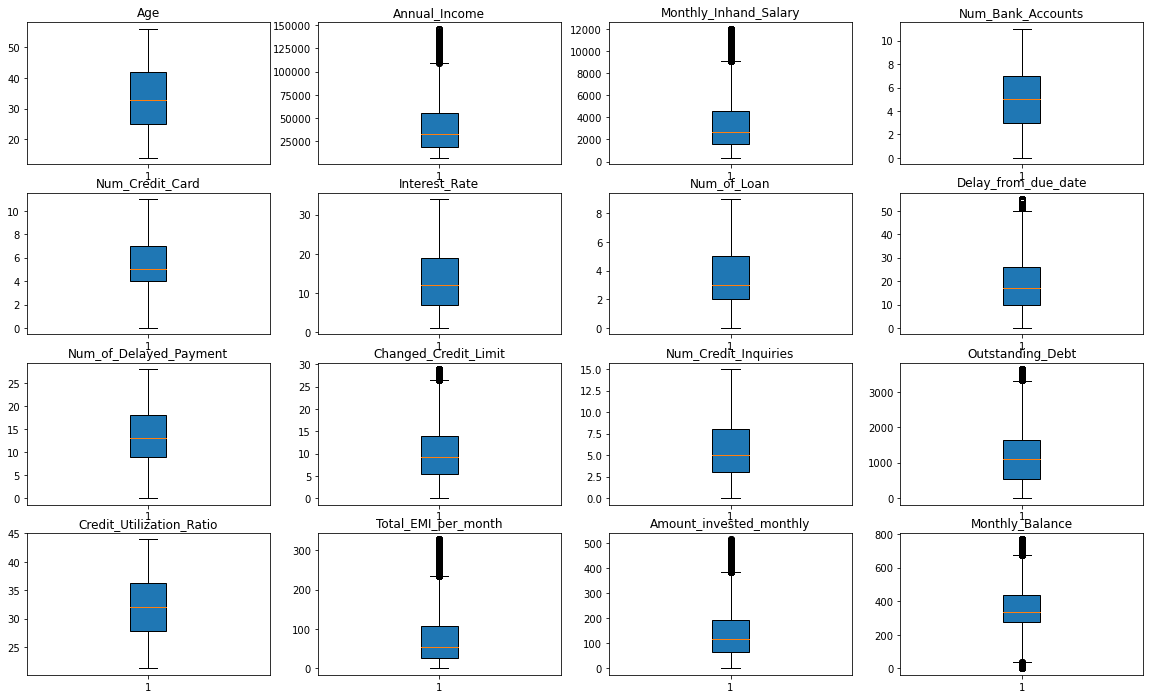

In [35]:
# vẽ botplot để kiểm tra lại tình trạng outliner của các biến 
#import matplotlib.pyplot as plt
nrows = 4
ncols = 4
fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,12), sharex = False , sharey = False)
numerical_column = df_new.iloc[:,0:16].columns
k=0
for i in range(nrows):
    for j in range(ncols):
            axs[i][j].boxplot(df_new[numerical_column[k]], notch= False, vert= True, patch_artist=True)
            axs[i][j].set_title(numerical_column[k])
            k = k+1


In [36]:
Cac biến như Age, Num_bank_Acount, .... đã được làm sạch, tiếp tục xóa outliner cho những biến còn lại

SyntaxError: invalid syntax (Temp/ipykernel_35472/3525997548.py, line 1)

In [37]:
# Xóa lần 1
numerical_column_1 =df_new[['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date',
                            'Changed_Credit_Limit','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']]

for k in numerical_column_1:
    Q1 = df_new[k].quantile(0.25)
    Q3 = df_new[k].quantile(0.75)
    IQR = Q3- Q1
    df_new = df_new.drop(df_new.loc[df_new[k] >  (Q3 + 1.5 * IQR )].index)
    df_new = df_new.drop(df_new.loc[df_new[k] <  (Q1 - 1.5 * IQR )].index)
df_new

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,26.822620,49.574949,80.415295,312.494089,CUS0xd40,Scientist,Good,No,HighspentSmallvaluepayments,Good
2,23.0,19114.12,1825.000000,3,4,3,4.0,3,7.0,11.00,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23.0,19114.12,1825.000000,3,4,3,4.0,5,4.0,6.27,...,31.377862,49.574949,199.458074,223.451310,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,6.0,11.27,...,24.797347,49.574949,41.420153,341.489231,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23.0,19114.12,1825.000000,3,4,3,4.0,8,4.0,9.27,...,27.262259,49.574949,62.430172,340.479212,CUS0xd40,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,...,39.323569,35.104023,140.581403,410.256158,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,...,34.663572,35.104023,60.971333,479.866228,CUS0x942c,Mechanic,Good,No,HighspentLargevaluepayments,Poor
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,...,40.565631,35.104023,54.185950,496.651610,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99998,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,11.50,...,33.638208,35.104023,251.672582,319.164979,CUS0x942c,Mechanic,Good,No,LowspentLargevaluepayments,Standard


Xóa thêm được 13k dữ liệu dơ, tiếp tục kiểm tra box plot

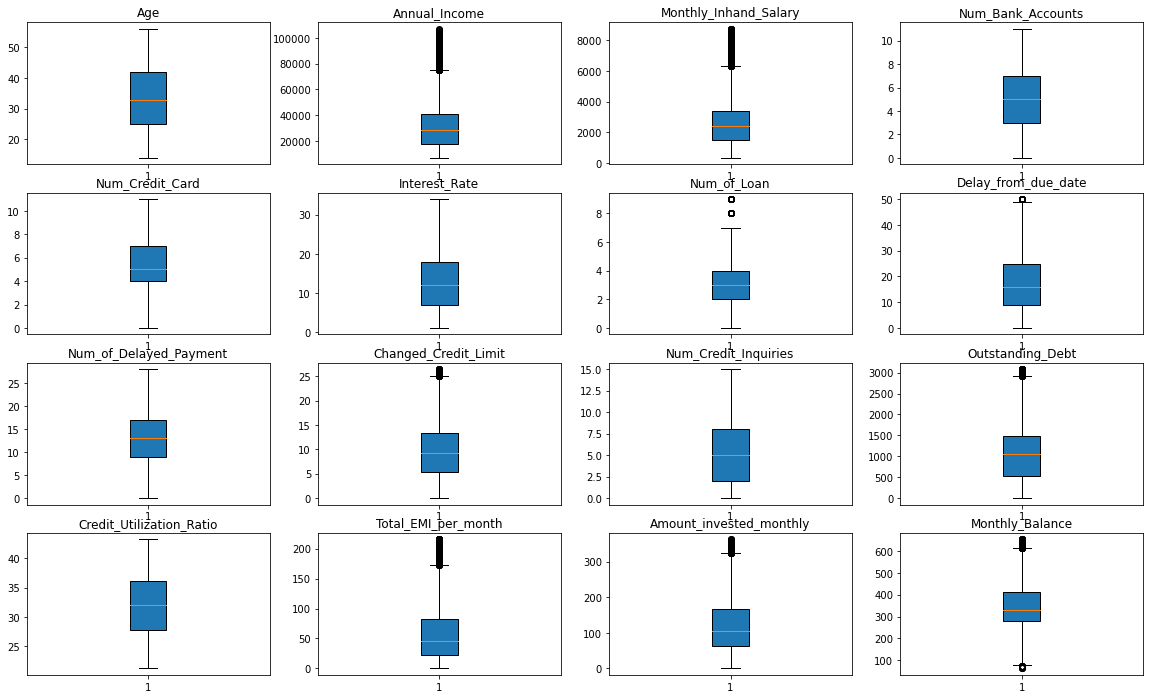

In [38]:
# vẽ botplot để xác định outliner 
#import matplotlib.pyplot as plt
nrows = 4
ncols = 4
fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,12), sharex = False , sharey = False)
numerical_column = df_new.iloc[:,0:16].columns
k=0
for i in range(nrows):
    for j in range(ncols):
            axs[i][j].boxplot(df_new[numerical_column[k]], notch= False, vert= True, patch_artist=True)
            axs[i][j].set_title(numerical_column[k])
            k = k+1


In [39]:
#xóa lần 2
numerical_column_2 =df_new[['Annual_Income','Monthly_Inhand_Salary','Num_of_Loan','Delay_from_due_date',
                            'Changed_Credit_Limit','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']]

for k in numerical_column_2:
    Q1 = df_new[k].quantile(0.25)
    Q3 = df_new[k].quantile(0.75)
    IQR = Q3- Q1
    df_new = df_new.drop(df_new.loc[df_new[k] >  (Q3 + 1.5 * IQR )].index)
    df_new = df_new.drop(df_new.loc[df_new[k] <  (Q1 - 1.5 * IQR )].index)
df_new

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,26.822620,49.574949,80.415295,312.494089,CUS0xd40,Scientist,Good,No,HighspentSmallvaluepayments,Good
2,23.0,19114.12,1825.000000,3,4,3,4.0,3,7.0,11.00,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23.0,19114.12,1825.000000,3,4,3,4.0,5,4.0,6.27,...,31.377862,49.574949,199.458074,223.451310,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,6.0,11.27,...,24.797347,49.574949,41.420153,341.489231,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23.0,19114.12,1825.000000,3,4,3,4.0,8,4.0,9.27,...,27.262259,49.574949,62.430172,340.479212,CUS0xd40,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,...,39.323569,35.104023,140.581403,410.256158,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,...,34.663572,35.104023,60.971333,479.866228,CUS0x942c,Mechanic,Good,No,HighspentLargevaluepayments,Poor
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,...,40.565631,35.104023,54.185950,496.651610,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99998,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,11.50,...,33.638208,35.104023,251.672582,319.164979,CUS0x942c,Mechanic,Good,No,LowspentLargevaluepayments,Standard


8k dữ liệu đã được xóa, tiếp tục kiểm tra bằng boxplot

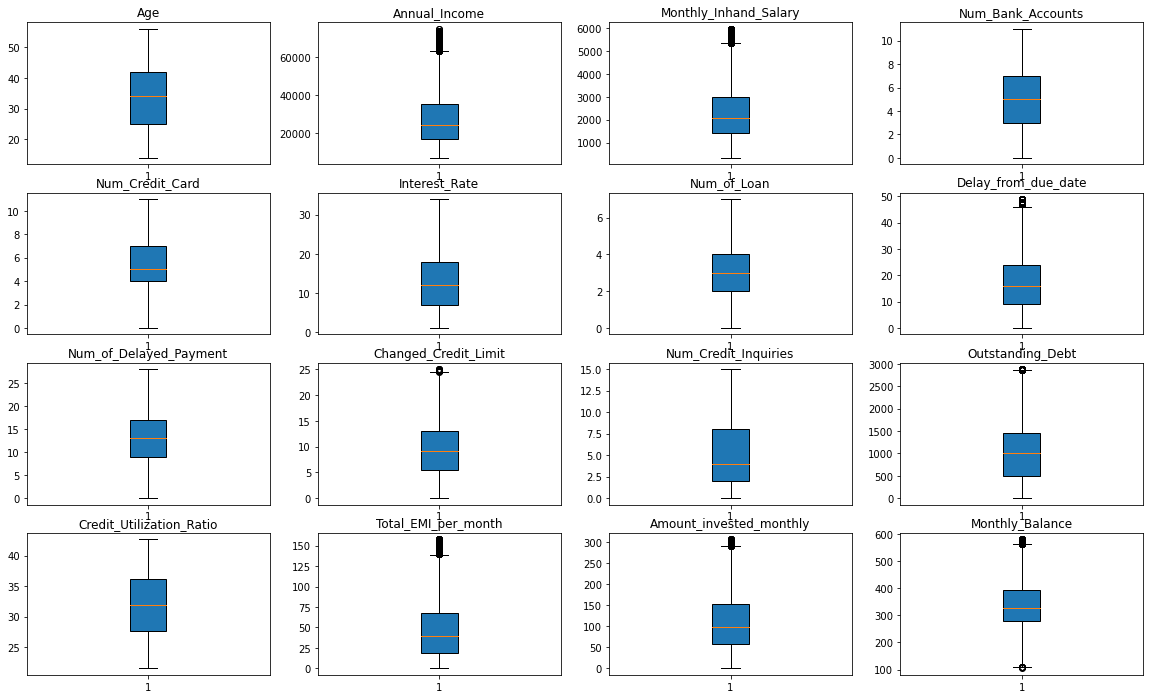

In [40]:
# vẽ botplot để xác định outliner 
#import matplotlib.pyplot as plt
nrows = 4
ncols = 4
fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,12), sharex = False , sharey = False)
numerical_column = df_new.iloc[:,0:16].columns
k=0
for i in range(nrows):
    for j in range(ncols):
            axs[i][j].boxplot(df_new[numerical_column[k]], notch= False, vert= True, patch_artist=True)
            axs[i][j].set_title(numerical_column[k])
            k = k+1


In [41]:
# xóa lần 3
numerical_column_3 =df_new[['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date',
                            'Changed_Credit_Limit','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']]

for k in numerical_column_3:
    Q1 = df_new[k].quantile(0.25)
    Q3 = df_new[k].quantile(0.75)
    IQR = Q3- Q1
    df_new = df_new.drop(df_new.loc[df_new[k] >  (Q3 + 1.5 * IQR )].index)
    df_new = df_new.drop(df_new.loc[df_new[k] <  (Q1 - 1.5 * IQR )].index)
df_new

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,26.822620,49.574949,80.415295,312.494089,CUS0xd40,Scientist,Good,No,HighspentSmallvaluepayments,Good
2,23.0,19114.12,1825.000000,3,4,3,4.0,3,7.0,11.00,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23.0,19114.12,1825.000000,3,4,3,4.0,5,4.0,6.27,...,31.377862,49.574949,199.458074,223.451310,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,6.0,11.27,...,24.797347,49.574949,41.420153,341.489231,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23.0,19114.12,1825.000000,3,4,3,4.0,8,4.0,9.27,...,27.262259,49.574949,62.430172,340.479212,CUS0xd40,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,...,39.323569,35.104023,140.581403,410.256158,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,...,34.663572,35.104023,60.971333,479.866228,CUS0x942c,Mechanic,Good,No,HighspentLargevaluepayments,Poor
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,...,40.565631,35.104023,54.185950,496.651610,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99998,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,11.50,...,33.638208,35.104023,251.672582,319.164979,CUS0x942c,Mechanic,Good,No,LowspentLargevaluepayments,Standard


tiếp tục xòa thêm 3k dữ liệu

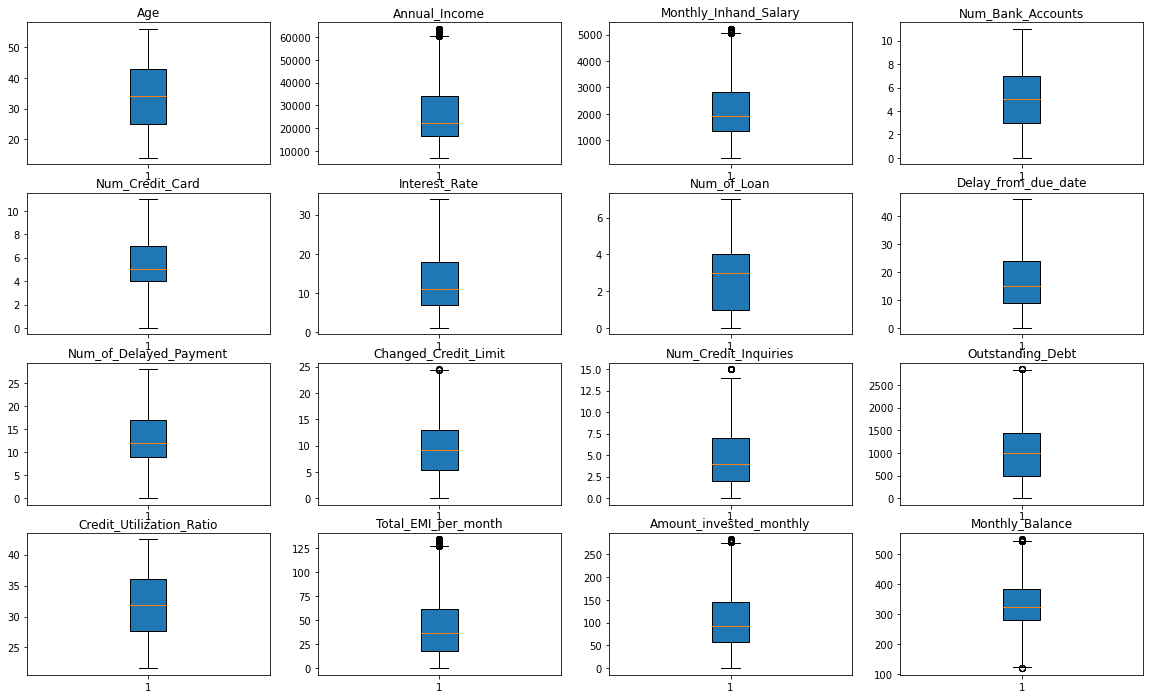

In [42]:
# vẽ botplot để xác định outliner 
#import matplotlib.pyplot as plt
nrows = 4
ncols = 4
fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,12), sharex = False , sharey = False)
numerical_column = df_new.iloc[:,0:16].columns
k=0
for i in range(nrows):
    for j in range(ncols):
            axs[i][j].boxplot(df_new[numerical_column[k]], notch= False, vert= True, patch_artist=True)
            axs[i][j].set_title(numerical_column[k])
            k = k+1


In [43]:
# xóa lần 4
numerical_column_4 =df_new[['Annual_Income','Monthly_Inhand_Salary',
                            'Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']]

for k in numerical_column_4:
    Q1 = df_new[k].quantile(0.25)
    Q3 = df_new[k].quantile(0.75)
    IQR = Q3- Q1
    df_new = df_new.drop(df_new.loc[df_new[k] >  (Q3 + 1.5 * IQR )].index)
    df_new = df_new.drop(df_new.loc[df_new[k] <  (Q1 - 1.5 * IQR )].index)
df_new


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,26.822620,49.574949,80.415295,312.494089,CUS0xd40,Scientist,Good,No,HighspentSmallvaluepayments,Good
2,23.0,19114.12,1825.000000,3,4,3,4.0,3,7.0,11.00,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23.0,19114.12,1825.000000,3,4,3,4.0,5,4.0,6.27,...,31.377862,49.574949,199.458074,223.451310,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,6.0,11.27,...,24.797347,49.574949,41.420153,341.489231,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23.0,19114.12,1825.000000,3,4,3,4.0,8,4.0,9.27,...,27.262259,49.574949,62.430172,340.479212,CUS0xd40,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,...,39.323569,35.104023,140.581403,410.256158,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,...,34.663572,35.104023,60.971333,479.866228,CUS0x942c,Mechanic,Good,No,HighspentLargevaluepayments,Poor
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,...,40.565631,35.104023,54.185950,496.651610,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99998,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,11.50,...,33.638208,35.104023,251.672582,319.164979,CUS0x942c,Mechanic,Good,No,LowspentLargevaluepayments,Standard


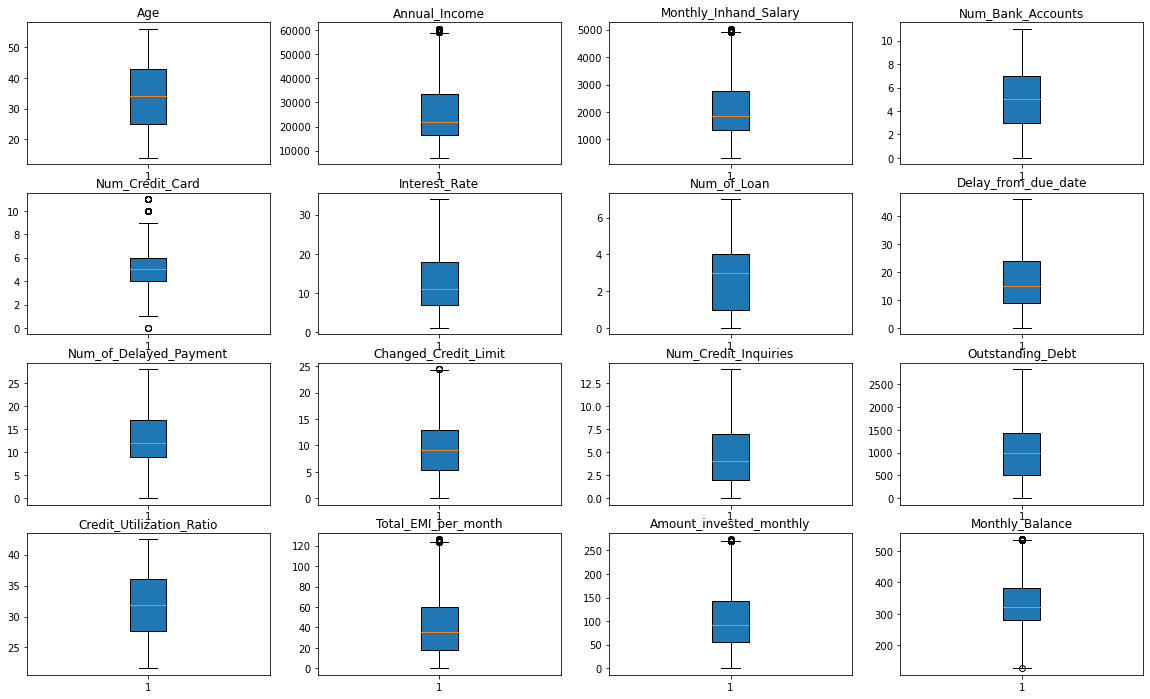

In [44]:
# vẽ botplot để xác định outliner 
#import matplotlib.pyplot as plt
nrows = 4
ncols = 4
fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,12), sharex = False , sharey = False)
numerical_column = df_new.iloc[:,0:16].columns
k=0
for i in range(nrows):
    for j in range(ncols):
            axs[i][j].boxplot(df_new[numerical_column[k]], notch= False, vert= True, patch_artist=True)
            axs[i][j].set_title(numerical_column[k])
            k = k+1


In [45]:
#xóa lần 5
numerical_column_5 =df_new[['Annual_Income','Monthly_Inhand_Salary','Num_Credit_Card',
                            'Changed_Credit_Limit','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']]

for k in numerical_column_5:
    Q1 = df_new[k].quantile(0.25)
    Q3 = df_new[k].quantile(0.75)
    IQR = Q3- Q1
    df_new = df_new.drop(df_new.loc[df_new[k] >  (Q3 + 1.5 * IQR )].index)
    df_new = df_new.drop(df_new.loc[df_new[k] <  (Q1 - 1.5 * IQR )].index)
df_new

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,26.822620,49.574949,80.415295,312.494089,CUS0xd40,Scientist,Good,No,HighspentSmallvaluepayments,Good
2,23.0,19114.12,1825.000000,3,4,3,4.0,3,7.0,11.00,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23.0,19114.12,1825.000000,3,4,3,4.0,5,4.0,6.27,...,31.377862,49.574949,199.458074,223.451310,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,6.0,11.27,...,24.797347,49.574949,41.420153,341.489231,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23.0,19114.12,1825.000000,3,4,3,4.0,8,4.0,9.27,...,27.262259,49.574949,62.430172,340.479212,CUS0xd40,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,...,39.323569,35.104023,140.581403,410.256158,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,...,34.663572,35.104023,60.971333,479.866228,CUS0x942c,Mechanic,Good,No,HighspentLargevaluepayments,Poor
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,...,40.565631,35.104023,54.185950,496.651610,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99998,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,11.50,...,33.638208,35.104023,251.672582,319.164979,CUS0x942c,Mechanic,Good,No,LowspentLargevaluepayments,Standard


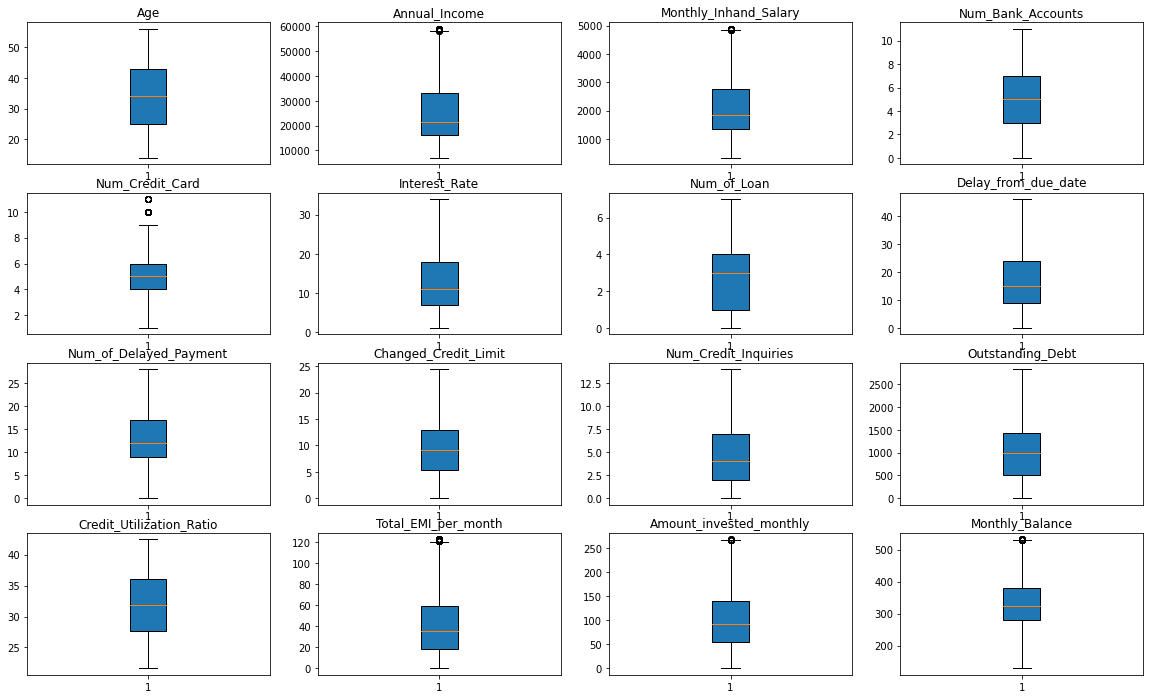

In [46]:
# vẽ botplot để xác định outliner 
#import matplotlib.pyplot as plt
nrows = 4
ncols = 4
fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,12), sharex = False , sharey = False)
numerical_column = df_new.iloc[:,0:16].columns
k=0
for i in range(nrows):
    for j in range(ncols):
            axs[i][j].boxplot(df_new[numerical_column[k]], notch= False, vert= True, patch_artist=True)
            axs[i][j].set_title(numerical_column[k])
            k = k+1


In [47]:
# xóa lần 6
numerical_column_6 =df_new[['Annual_Income','Monthly_Inhand_Salary','Num_Credit_Card',
                            'Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']]

for k in numerical_column_6:
    Q1 = df_new[k].quantile(0.25)
    Q3 = df_new[k].quantile(0.75)
    IQR = Q3- Q1
    df_new = df_new.drop(df_new.loc[df_new[k] >  (Q3 + 1.5 * IQR )].index)
    df_new = df_new.drop(df_new.loc[df_new[k] <  (Q1 - 1.5 * IQR )].index)
df_new

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,26.822620,49.574949,80.415295,312.494089,CUS0xd40,Scientist,Good,No,HighspentSmallvaluepayments,Good
2,23.0,19114.12,1825.000000,3,4,3,4.0,3,7.0,11.00,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23.0,19114.12,1825.000000,3,4,3,4.0,5,4.0,6.27,...,31.377862,49.574949,199.458074,223.451310,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,6.0,11.27,...,24.797347,49.574949,41.420153,341.489231,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23.0,19114.12,1825.000000,3,4,3,4.0,8,4.0,9.27,...,27.262259,49.574949,62.430172,340.479212,CUS0xd40,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,...,39.323569,35.104023,140.581403,410.256158,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,...,34.663572,35.104023,60.971333,479.866228,CUS0x942c,Mechanic,Good,No,HighspentLargevaluepayments,Poor
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,...,40.565631,35.104023,54.185950,496.651610,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99998,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,11.50,...,33.638208,35.104023,251.672582,319.164979,CUS0x942c,Mechanic,Good,No,LowspentLargevaluepayments,Standard


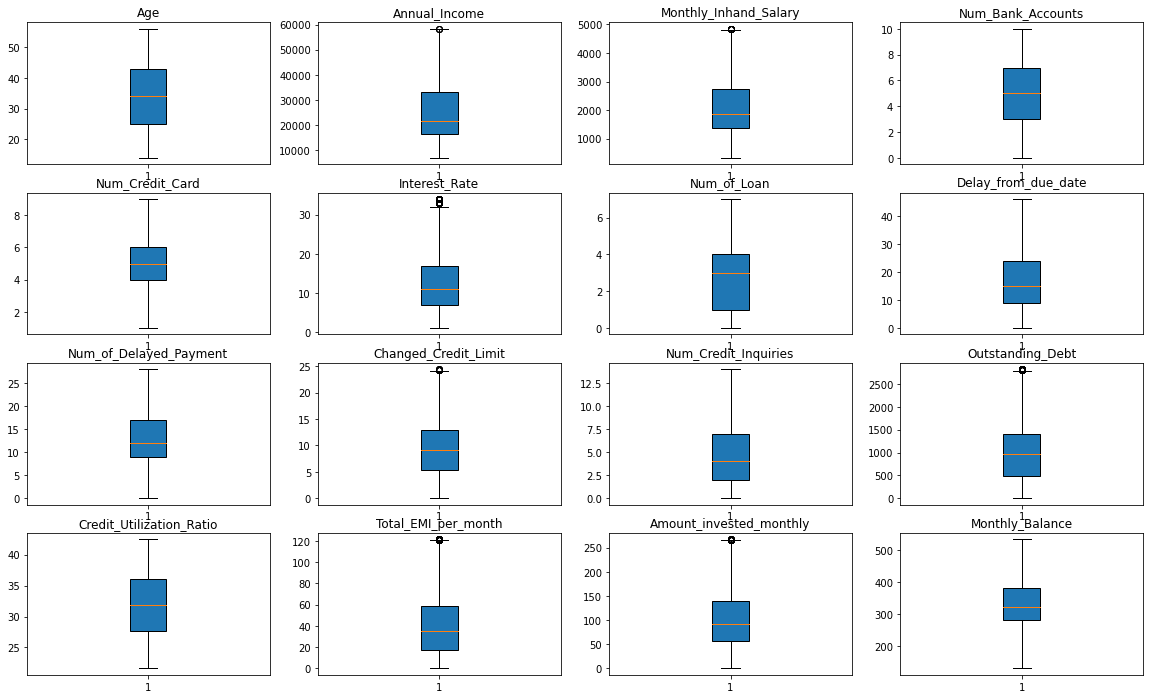

In [48]:
# vẽ botplot để xác định outliner 
#import matplotlib.pyplot as plt
nrows = 4
ncols = 4
fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,12), sharex = False , sharey = False)
numerical_column = df_new.iloc[:,0:16].columns
k=0
for i in range(nrows):
    for j in range(ncols):
            axs[i][j].boxplot(df_new[numerical_column[k]], notch= False, vert= True, patch_artist=True)
            axs[i][j].set_title(numerical_column[k])
            k = k+1


In [49]:
# xóa lần 7
numerical_column_7 =df_new[['Annual_Income','Monthly_Inhand_Salary', 'Interest_Rate',
                            'Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly',]]

for k in numerical_column_7:
    Q1 = df_new[k].quantile(0.25)
    Q3 = df_new[k].quantile(0.75)
    IQR = Q3- Q1
    df_new = df_new.drop(df_new.loc[df_new[k] >  (Q3 + 1.5 * IQR )].index)
    df_new = df_new.drop(df_new.loc[df_new[k] <  (Q1 - 1.5 * IQR )].index)
df_new

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,26.822620,49.574949,80.415295,312.494089,CUS0xd40,Scientist,Good,No,HighspentSmallvaluepayments,Good
2,23.0,19114.12,1825.000000,3,4,3,4.0,3,7.0,11.00,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23.0,19114.12,1825.000000,3,4,3,4.0,5,4.0,6.27,...,31.377862,49.574949,199.458074,223.451310,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,6.0,11.27,...,24.797347,49.574949,41.420153,341.489231,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23.0,19114.12,1825.000000,3,4,3,4.0,8,4.0,9.27,...,27.262259,49.574949,62.430172,340.479212,CUS0xd40,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,...,39.323569,35.104023,140.581403,410.256158,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,...,34.663572,35.104023,60.971333,479.866228,CUS0x942c,Mechanic,Good,No,HighspentLargevaluepayments,Poor
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,...,40.565631,35.104023,54.185950,496.651610,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99998,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,11.50,...,33.638208,35.104023,251.672582,319.164979,CUS0x942c,Mechanic,Good,No,LowspentLargevaluepayments,Standard


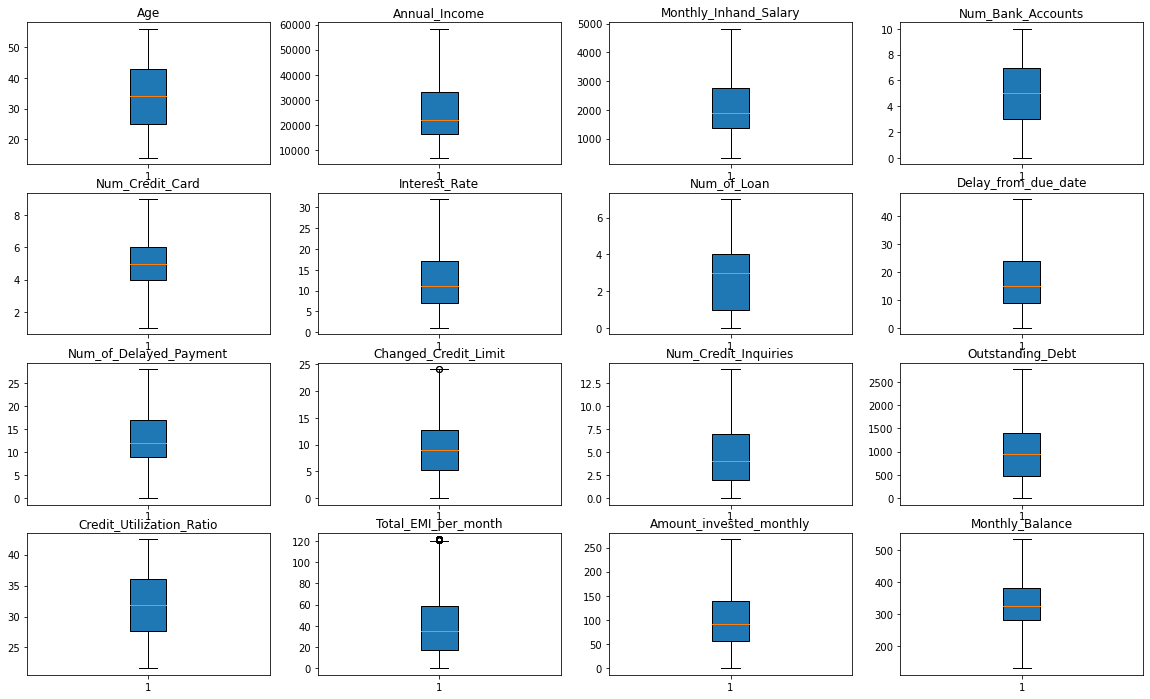

In [50]:
# vẽ botplot để xác định outliner 
#import matplotlib.pyplot as plt
nrows = 4
ncols = 4
fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,12), sharex = False , sharey = False)
numerical_column = df_new.iloc[:,0:16].columns
k=0
for i in range(nrows):
    for j in range(ncols):
            axs[i][j].boxplot(df_new[numerical_column[k]], notch= False, vert= True, patch_artist=True)
            axs[i][j].set_title(numerical_column[k])
            k = k+1


In [51]:
# xóa lần 8
numerical_column_8 =df_new[['Changed_Credit_Limit','Total_EMI_per_month']]

for k in numerical_column_8:
    Q1 = df_new[k].quantile(0.25)
    Q3 = df_new[k].quantile(0.75)
    IQR = Q3- Q1
    df_new = df_new.drop(df_new.loc[df_new[k] >  (Q3 + 1.5 * IQR )].index)
    df_new = df_new.drop(df_new.loc[df_new[k] <  (Q1 - 1.5 * IQR )].index)
df_new

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,26.822620,49.574949,80.415295,312.494089,CUS0xd40,Scientist,Good,No,HighspentSmallvaluepayments,Good
2,23.0,19114.12,1825.000000,3,4,3,4.0,3,7.0,11.00,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23.0,19114.12,1825.000000,3,4,3,4.0,5,4.0,6.27,...,31.377862,49.574949,199.458074,223.451310,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,6.0,11.27,...,24.797347,49.574949,41.420153,341.489231,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23.0,19114.12,1825.000000,3,4,3,4.0,8,4.0,9.27,...,27.262259,49.574949,62.430172,340.479212,CUS0xd40,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,...,39.323569,35.104023,140.581403,410.256158,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,...,34.663572,35.104023,60.971333,479.866228,CUS0x942c,Mechanic,Good,No,HighspentLargevaluepayments,Poor
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,...,40.565631,35.104023,54.185950,496.651610,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99998,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,11.50,...,33.638208,35.104023,251.672582,319.164979,CUS0x942c,Mechanic,Good,No,LowspentLargevaluepayments,Standard


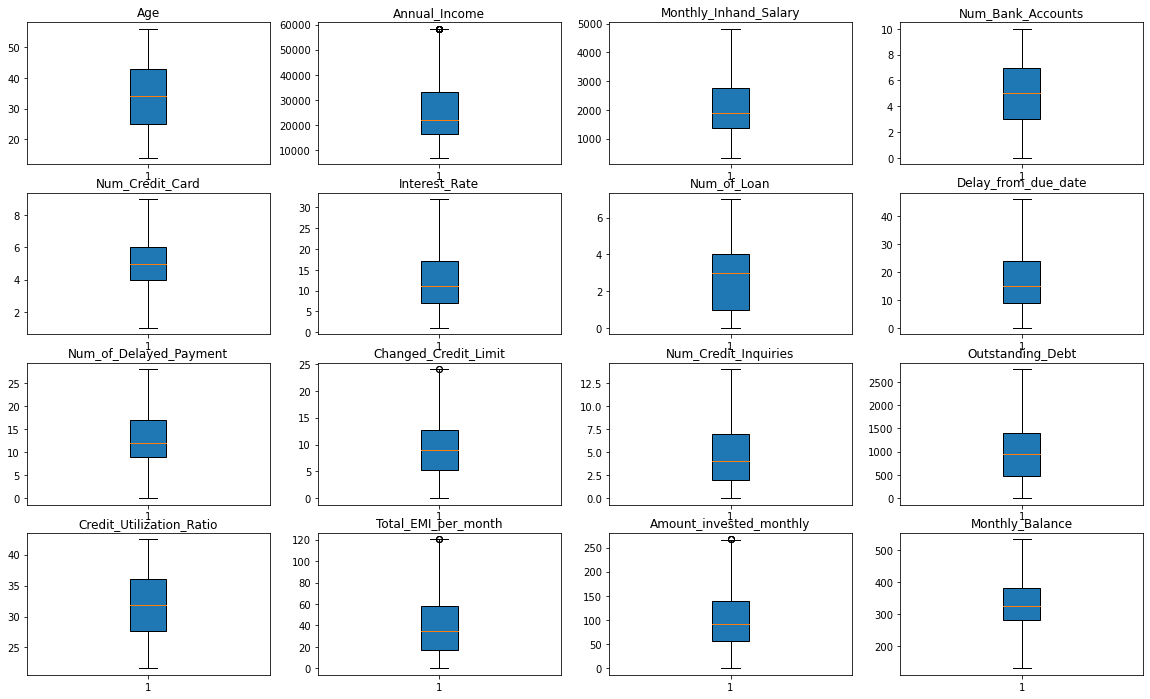

In [52]:
# vẽ botplot để xác định outliner 
#import matplotlib.pyplot as plt
nrows = 4
ncols = 4
fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,12), sharex = False , sharey = False)
numerical_column = df_new.iloc[:,0:16].columns
k=0
for i in range(nrows):
    for j in range(ncols):
            axs[i][j].boxplot(df_new[numerical_column[k]], notch= False, vert= True, patch_artist=True)
            axs[i][j].set_title(numerical_column[k])
            k = k+1


In [53]:
# xóa lần 9
numerical_column_9 =df_new[['Annual_Income',
    'Changed_Credit_Limit','Total_EMI_per_month','Amount_invested_monthly']]

for k in numerical_column_9:
    Q1 = df_new[k].quantile(0.25)
    Q3 = df_new[k].quantile(0.75)
    IQR = Q3- Q1
    df_new = df_new.drop(df_new.loc[df_new[k] >  (Q3 + 1.5 * IQR )].index)
    df_new = df_new.drop(df_new.loc[df_new[k] <  (Q1 - 1.5 * IQR )].index)
df_new

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,26.822620,49.574949,80.415295,312.494089,CUS0xd40,Scientist,Good,No,HighspentSmallvaluepayments,Good
2,23.0,19114.12,1825.000000,3,4,3,4.0,3,7.0,11.00,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23.0,19114.12,1825.000000,3,4,3,4.0,5,4.0,6.27,...,31.377862,49.574949,199.458074,223.451310,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,6.0,11.27,...,24.797347,49.574949,41.420153,341.489231,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23.0,19114.12,1825.000000,3,4,3,4.0,8,4.0,9.27,...,27.262259,49.574949,62.430172,340.479212,CUS0xd40,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,...,39.323569,35.104023,140.581403,410.256158,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,...,34.663572,35.104023,60.971333,479.866228,CUS0x942c,Mechanic,Good,No,HighspentLargevaluepayments,Poor
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,...,40.565631,35.104023,54.185950,496.651610,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99998,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,11.50,...,33.638208,35.104023,251.672582,319.164979,CUS0x942c,Mechanic,Good,No,LowspentLargevaluepayments,Standard


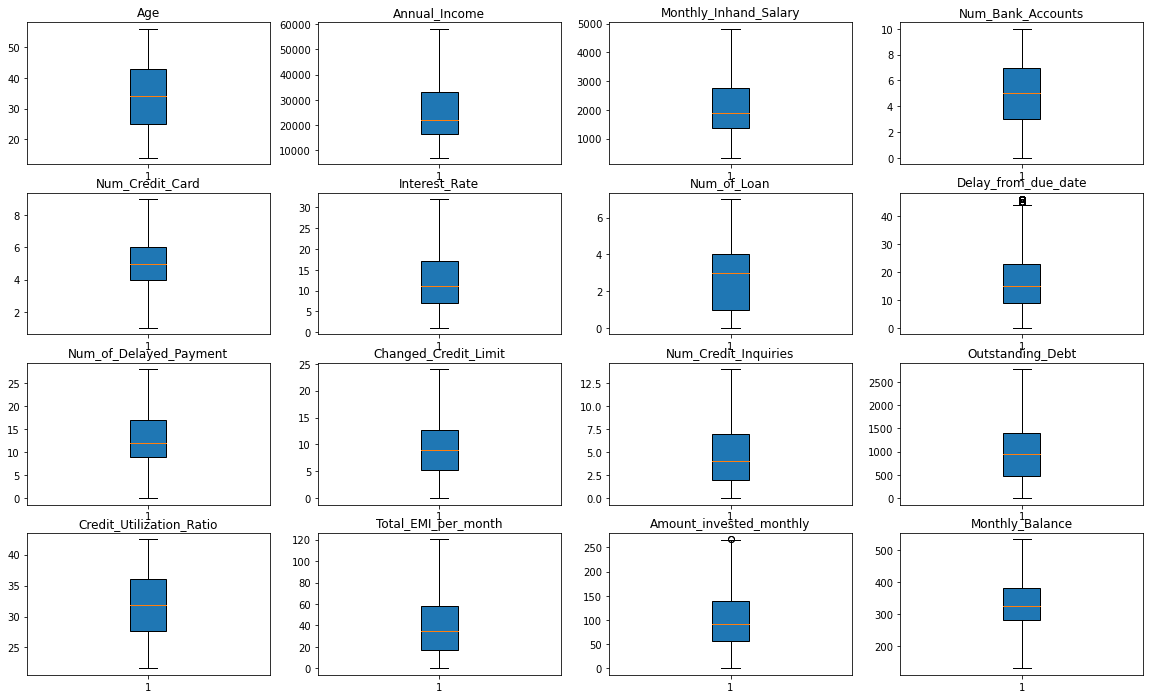

In [54]:
# vẽ botplot để xác định outliner 
#import matplotlib.pyplot as plt
nrows = 4
ncols = 4
fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,12), sharex = False , sharey = False)
numerical_column = df_new.iloc[:,0:16].columns
k=0
for i in range(nrows):
    for j in range(ncols):
            axs[i][j].boxplot(df_new[numerical_column[k]], notch= False, vert= True, patch_artist=True)
            axs[i][j].set_title(numerical_column[k])
            k = k+1


In [55]:
# xóa lần 10
numerical_column_10 =df_new[['Delay_from_due_date',
                            'Amount_invested_monthly']]

for k in numerical_column_10:
    Q1 = df_new[k].quantile(0.25)
    Q3 = df_new[k].quantile(0.75)
    IQR = Q3- Q1
    df_new = df_new.drop(df_new.loc[df_new[k] >  (Q3 + 1.5 * IQR )].index)
    df_new = df_new.drop(df_new.loc[df_new[k] <  (Q1 - 1.5 * IQR )].index)
df_new

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,26.822620,49.574949,80.415295,312.494089,CUS0xd40,Scientist,Good,No,HighspentSmallvaluepayments,Good
2,23.0,19114.12,1825.000000,3,4,3,4.0,3,7.0,11.00,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23.0,19114.12,1825.000000,3,4,3,4.0,5,4.0,6.27,...,31.377862,49.574949,199.458074,223.451310,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,6.0,11.27,...,24.797347,49.574949,41.420153,341.489231,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23.0,19114.12,1825.000000,3,4,3,4.0,8,4.0,9.27,...,27.262259,49.574949,62.430172,340.479212,CUS0xd40,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,...,39.323569,35.104023,140.581403,410.256158,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,...,34.663572,35.104023,60.971333,479.866228,CUS0x942c,Mechanic,Good,No,HighspentLargevaluepayments,Poor
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,...,40.565631,35.104023,54.185950,496.651610,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99998,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,11.50,...,33.638208,35.104023,251.672582,319.164979,CUS0x942c,Mechanic,Good,No,LowspentLargevaluepayments,Standard


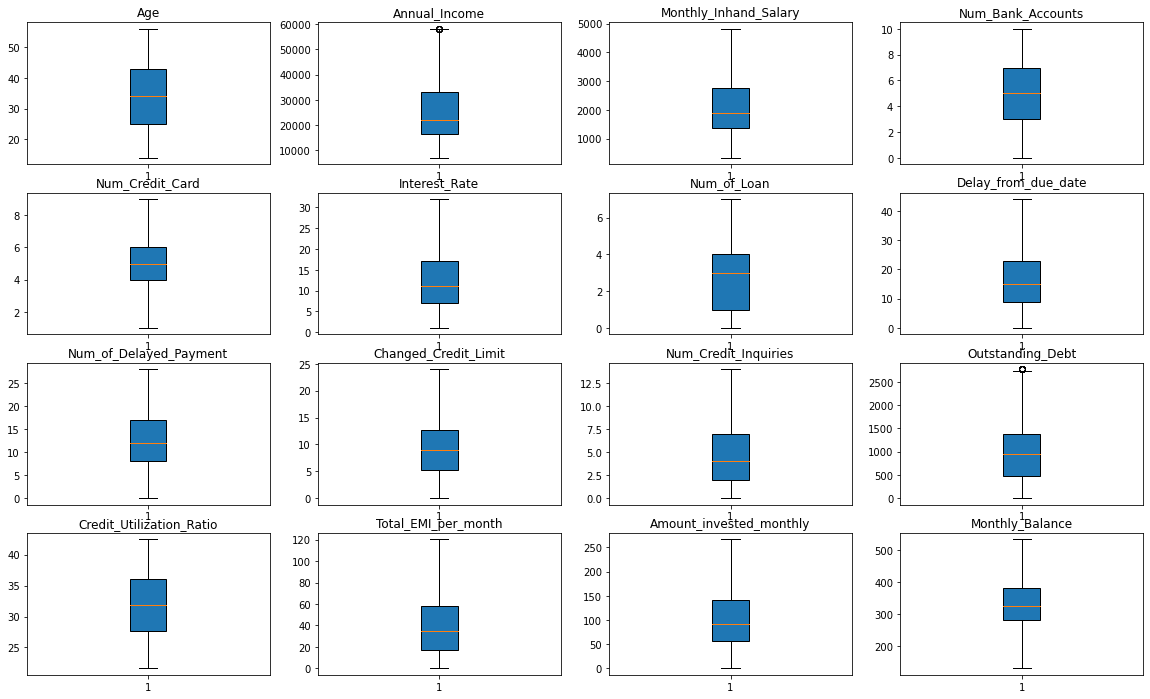

In [56]:
# vẽ botplot để xác định outliner 
#import matplotlib.pyplot as plt
nrows = 4
ncols = 4
fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,12), sharex = False , sharey = False)
numerical_column = df_new.iloc[:,0:16].columns
k=0
for i in range(nrows):
    for j in range(ncols):
            axs[i][j].boxplot(df_new[numerical_column[k]], notch= False, vert= True, patch_artist=True)
            axs[i][j].set_title(numerical_column[k])
            k = k+1


In [57]:
# xóa lần 11
numerical_column_11 =df_new[['Annual_Income',
                            'Outstanding_Debt']]

for k in numerical_column_11:
    Q1 = df_new[k].quantile(0.25)
    Q3 = df_new[k].quantile(0.75)
    IQR = Q3- Q1
    df_new = df_new.drop(df_new.loc[df_new[k] >  (Q3 + 1.5 * IQR )].index)
    df_new = df_new.drop(df_new.loc[df_new[k] <  (Q1 - 1.5 * IQR )].index)
df_new

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,26.822620,49.574949,80.415295,312.494089,CUS0xd40,Scientist,Good,No,HighspentSmallvaluepayments,Good
2,23.0,19114.12,1825.000000,3,4,3,4.0,3,7.0,11.00,...,28.609352,49.574949,81.699521,331.209863,CUS0xd40,Scientist,Good,No,LowspentMediumvaluepayments,Good
3,23.0,19114.12,1825.000000,3,4,3,4.0,5,4.0,6.27,...,31.377862,49.574949,199.458074,223.451310,CUS0xd40,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,6.0,11.27,...,24.797347,49.574949,41.420153,341.489231,CUS0xd40,Scientist,Good,No,HighspentMediumvaluepayments,Good
5,23.0,19114.12,1825.000000,3,4,3,4.0,8,4.0,9.27,...,27.262259,49.574949,62.430172,340.479212,CUS0xd40,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,...,39.323569,35.104023,140.581403,410.256158,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,...,34.663572,35.104023,60.971333,479.866228,CUS0x942c,Mechanic,Good,No,HighspentLargevaluepayments,Poor
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,...,40.565631,35.104023,54.185950,496.651610,CUS0x942c,Mechanic,Good,No,HighspentMediumvaluepayments,Poor
99998,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,11.50,...,33.638208,35.104023,251.672582,319.164979,CUS0x942c,Mechanic,Good,No,LowspentLargevaluepayments,Standard


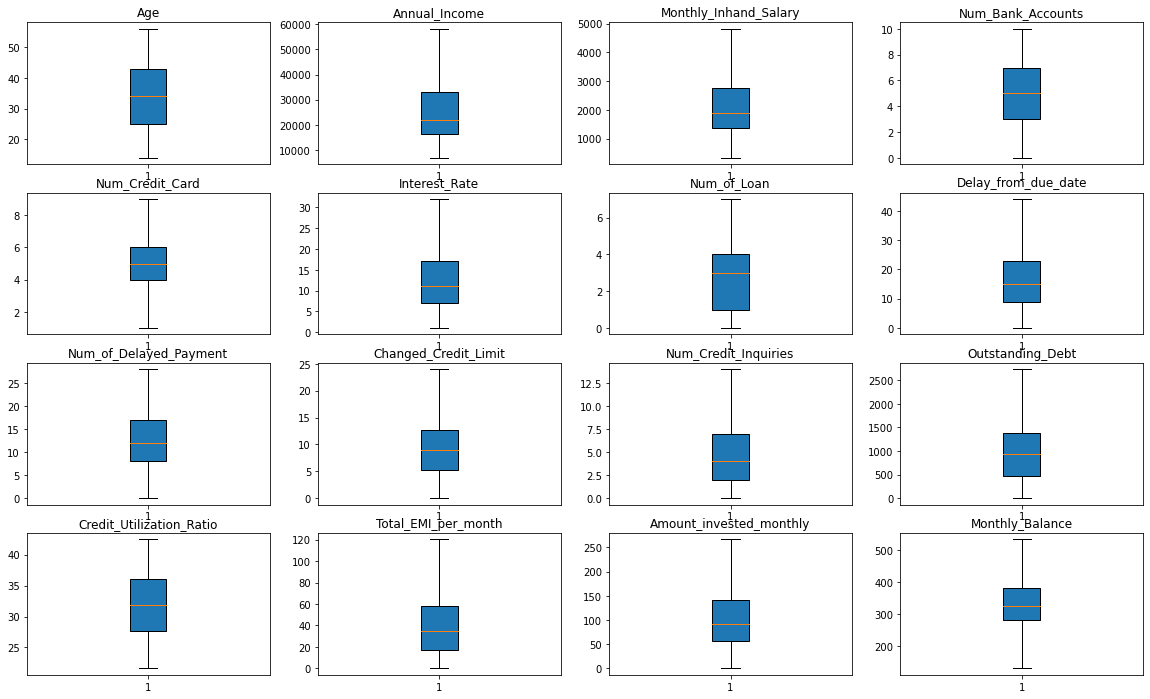

In [58]:
# vẽ botplot để xác định outliner 
#import matplotlib.pyplot as plt
nrows = 4
ncols = 4
fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,12), sharex = False , sharey = False)
numerical_column = df_new.iloc[:,0:16].columns
k=0
for i in range(nrows):
    for j in range(ncols):
            axs[i][j].boxplot(df_new[numerical_column[k]], notch= False, vert= True, patch_artist=True)
            axs[i][j].set_title(numerical_column[k])
            k = k+1


In [59]:
# xóa những dòng có kí tự lạ
index = df_new[df_new['Payment_Behaviour'] == '!@9#%8'].index
df_new= df_new.drop(index = index )
df_new.shape

(28990, 22)

In [60]:
# group by các cột numerical theo customer_ID  by mean
df_new_num = df_new.groupby(['Customer_ID']).mean().reset_index()
df_new_num = round (df_new_num)
# tìm giá trị null trong dataset
age_null = df_new_num.index[df_new_num['Age'].isnull()].tolist()
len(age_null)

7110

In [61]:
# xóa những dòng null trong dataset mới
df_new_num.drop ( index = age_null, axis = 0, inplace = True)
df_new_num.shape

(5390, 17)

In [62]:
# tạo lại các cột category, gán giá tri bằng nan
df_new_num[['Occupation','Payment_Behaviour','Payment_of_Min_Amount','Credit_Score']]= np.nan
df_new_num.head()

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation,Payment_Behaviour,Payment_of_Min_Amount,Credit_Score
1,CUS0x1009,26.0,52313.0,4250.0,6.0,5.0,17.0,4.0,7.0,18.0,...,3.0,203.0,32.0,108.0,118.0,449.0,NaN,NaN,NaN,NaN
5,CUS0x1015,27.0,46951.0,3726.0,7.0,4.0,16.0,0.0,8.0,10.0,...,6.0,340.0,37.0,0.0,257.0,437.0,NaN,NaN,NaN,NaN
9,CUS0x102e,26.0,50807.0,4198.0,8.0,4.0,11.0,4.0,12.0,10.0,...,4.0,870.0,35.0,89.0,124.0,465.0,NaN,NaN,NaN,NaN
11,CUS0x1037,44.0,15989.0,1086.0,5.0,4.0,2.0,4.0,12.0,15.0,...,3.0,666.0,33.0,34.0,106.0,259.0,NaN,NaN,NaN,NaN
15,CUS0x1044,44.0,33442.0,2749.0,2.0,4.0,1.0,0.0,2.0,4.0,...,4.0,155.0,30.0,0.0,145.0,389.0,NaN,NaN,NaN,NaN


In [63]:
# tạo 1 dataset làm dictionary để ánh xạ
df_new1= df_new.drop_duplicates( subset= ['Customer_ID'], keep = 'first')


In [64]:
i = ['Occupation','Payment_Behaviour','Payment_of_Min_Amount','Credit_Score']
for k in i:
    # tạo ditionary
    dict_k = dict(zip(df_new1['Customer_ID'],df_new1[k]))

    # fill dữ liệu NA
    df_new_num[k] = df_new_num[k].fillna(df_new_num['Customer_ID'].map(dict_k)) 

In [65]:
df_new_num.shape

(5390, 21)

Sau 11 lần xóa dữ liệu đã hoàn toàn sạch sẽ, bắt đầu tiến đến phân tích mô tả

PHÂN TÍCH MÔ TẢ

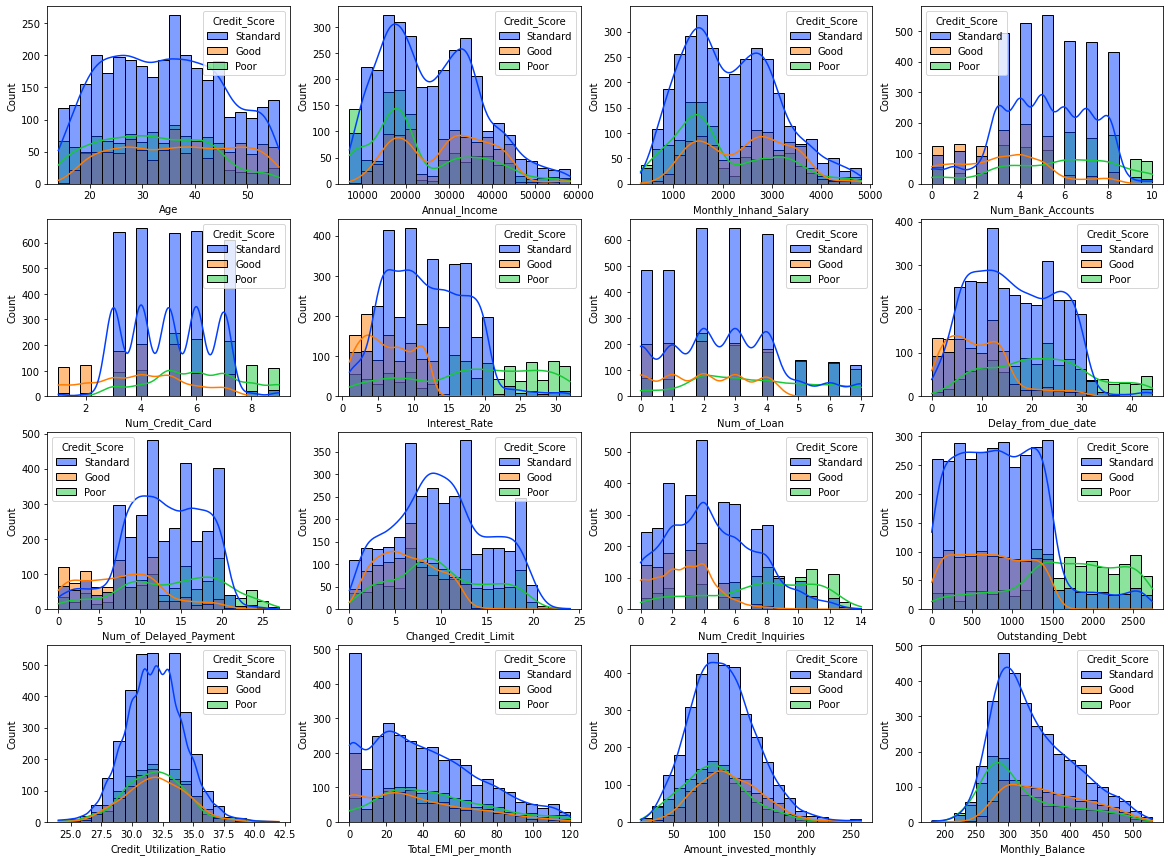

In [66]:
# phân bổ tín dụng các biến numerial
import seaborn as sns

fig, axs = plt.subplots( nrows = 4, ncols = 4 , figsize = (20,15), sharex = False , sharey = False)
numerical_column = df_new_num.iloc[:,1:17].columns

k=0
for i in range(nrows):
    for j in range(ncols):
        sns.histplot(data=df_new_num, x=numerical_column[k] ,hue= 'Credit_Score',palette ='bright', kde=True,bins=20, ax=axs[i, j])
        
        k =k +1

Text(0.5, 1.0, 'Number of Customer by  Occupacy')

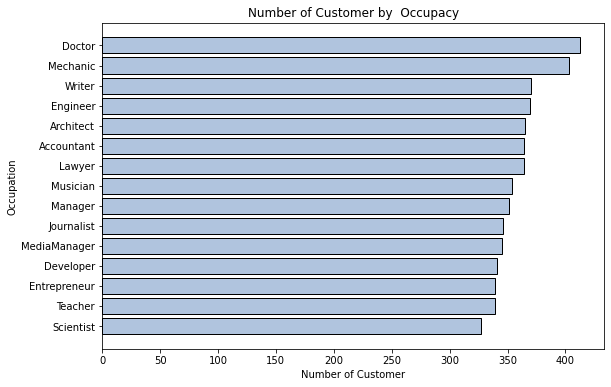

In [67]:
# Mô tả các nhóm ngành sử dụng tính dụng nhiều nhất
y = df_new.groupby(['Occupation'])['Customer_ID'].nunique().sort_values()
x =df_new['Occupation'].unique()

plt.figure(figsize = (9, 6))
plt.barh(x , y, color = 'lightsteelblue', edgecolor = 'black' , label = x )
plt.xlabel('Number of Customer')
plt.ylabel('Occupation')
plt.title('Number of Customer by  Occupacy')

In [ ]:
# Mô tả chung xếp loại tín dụng của các nhom



Text(0.5, 1.0, 'Phần trăm xếp hạng tín dụng')

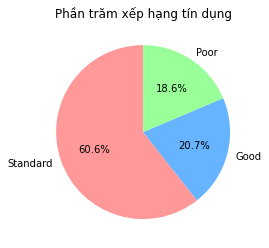

In [68]:
# vẽ pie chart xem khách hàng đang được xếp loại tín dụng
plt.pie(df_new_num['Credit_Score'].value_counts() , labels = list(df_new_num['Credit_Score'].unique()), startangle = 90 , autopct='%1.1f%%', pctdistance = 0.6
                                               ,colors = ['#ff9999','#66b3ff','#99ff99'])
plt.title('Phần trăm xếp hạng tín dụng')

# Mã hóa dữ liệu

In [69]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder ()
df_new_num ['Occupation'] = LabelEncoder.fit_transform(df_new_num ['Occupation'])
df_new_num ['Payment_of_Min_Amount'] = LabelEncoder.fit_transform(df_new_num ['Payment_of_Min_Amount'])
df_new_num ['Payment_Behaviour'] = LabelEncoder.fit_transform(df_new_num ['Payment_Behaviour'])
df_new_num ['Credit_Score'] = LabelEncoder.fit_transform(df_new_num ['Credit_Score'])
df_new_num.head()

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation,Payment_Behaviour,Payment_of_Min_Amount,Credit_Score
1,CUS0x1009,26.0,52313.0,4250.0,6.0,5.0,17.0,4.0,7.0,18.0,...,3.0,203.0,32.0,108.0,118.0,449.0,9,1,2,2
5,CUS0x1015,27.0,46951.0,3726.0,7.0,4.0,16.0,0.0,8.0,10.0,...,6.0,340.0,37.0,0.0,257.0,437.0,6,4,2,2
9,CUS0x102e,26.0,50807.0,4198.0,8.0,4.0,11.0,4.0,12.0,10.0,...,4.0,870.0,35.0,89.0,124.0,465.0,12,0,2,2
11,CUS0x1037,44.0,15989.0,1086.0,5.0,4.0,2.0,4.0,12.0,15.0,...,3.0,666.0,33.0,34.0,106.0,259.0,0,5,1,0
15,CUS0x1044,44.0,33442.0,2749.0,2.0,4.0,1.0,0.0,2.0,4.0,...,4.0,155.0,30.0,0.0,145.0,389.0,5,2,1,2


# chọn biến đầu vào

<AxesSubplot:>

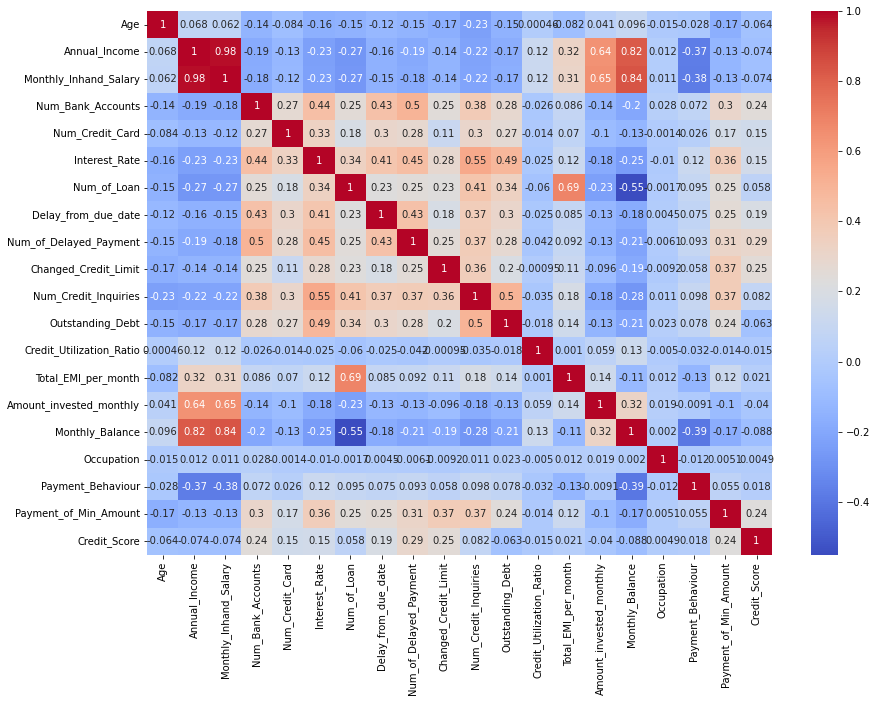

In [70]:
# vẽ heatmap để xác định những biến đầu vào phù hợp
import seaborn as sns
plt.figure (figsize =(14,10))
sns.heatmap(df_new_num.corr(), annot = True , cmap = 'coolwarm')

In [118]:
df_new_num.corr()['Credit_Score'].sort_values(ascending = False)

Credit_Score                1.000000
Num_of_Delayed_Payment      0.291158
Changed_Credit_Limit        0.253574
Num_Bank_Accounts           0.243288
Payment_of_Min_Amount       0.235294
Delay_from_due_date         0.193485
Interest_Rate               0.151766
Num_Credit_Card             0.147001
Num_Credit_Inquiries        0.081782
Num_of_Loan                 0.058172
Total_EMI_per_month         0.020515
Payment_Behaviour           0.017516
Occupation                  0.004901
Credit_Utilization_Ratio   -0.014716
Amount_invested_monthly    -0.040081
Outstanding_Debt           -0.063426
Age                        -0.063559
Monthly_Inhand_Salary      -0.073821
Annual_Income              -0.074295
Monthly_Balance            -0.088152
Name: Credit_Score, dtype: float64

In [136]:
# chọn biến X vả y
X= df_new_num.iloc[:,1:20].values
y= df_new_num.Credit_Score.values


# MODEL+ EVALUATION

In [137]:
# tạo list rỗng
import numpy as np
accuracy_score_list =[] 
model = ['Logistic', 'GNB','RandomForest']

In [138]:
# phân chia tập test tập train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y ,test_size =0.3 , random_state = 0)

In [139]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((3773, 19), (1617, 19), (3773,), (1617,))

In [140]:
# 1 Logistic Tree
from sklearn.linear_model import LogisticRegression
model_log =LogisticRegression()
model_log.fit(X_train, y_train)
y_log_predict= model_log.predict(X_test)
y_log_predict.shape

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(1617,)

In [141]:
# đánh giá model
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score,roc_curve

In [142]:
#accuracy score
accuracy_score = accuracy_score(y_test,y_log_predict)
accuracy_score_list.append(accuracy_score)

In [143]:
#2 Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit (X_train,y_train)
y_gauss_predict = GNB.predict (X_test)

In [144]:
# đánh giá model
# accuracy_score
from sklearn.metrics import accuracy_score 
accuracy_score_GNB = accuracy_score(y_test,y_gauss_predict)
accuracy_score_list.append (accuracy_score_GNB)

In [145]:
#3 Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=5) #số lượng các cây quyết định được sử dụng trong mô hình 
model_rf.fit(X_train, y_train)
y_rf_predict = model_rf.predict(X_test)


In [146]:
# đánh giá model
#accuracy score
from sklearn.metrics import accuracy_score 
accuracy_score_rf = accuracy_score(y_test, y_rf_predict)
accuracy_score_list.append (accuracy_score_rf)

In [147]:
#summary ket qua đánh giá của 4 model
df_summary = pd.DataFrame({'Model':model,'Accuracy':accuracy_score_list }, 
                          columns =['Model','Accuracy'] )
df_summary

,Model,Accuracy
0,Logistic,0.657390
1,GNB,0.719233
2,RandomForest,0.737168


# So sánh các classification report của 3 model với nhau

In [148]:
#classification report logis 
print (classification_report(y_test, y_log_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       311
           1       0.72      0.50      0.59       347
           2       0.65      0.93      0.76       959

    accuracy                           0.66      1617
   macro avg       0.46      0.47      0.45      1617
weighted avg       0.54      0.66      0.58      1617



In [149]:
#classification report gnb
print (classification_report(y_test, y_gauss_predict))

              precision    recall  f1-score   support

           0       0.50      0.81      0.62       311
           1       0.72      0.67      0.69       347
           2       0.86      0.71      0.78       959

    accuracy                           0.72      1617
   macro avg       0.69      0.73      0.69      1617
weighted avg       0.76      0.72      0.73      1617



In [150]:
#classification report random foreest
print (classification_report(y_test, y_rf_predict))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60       311
           1       0.70      0.69      0.69       347
           2       0.81      0.79      0.80       959

    accuracy                           0.74      1617
   macro avg       0.69      0.70      0.70      1617
weighted avg       0.74      0.74      0.74      1617



# Xử lý mất cân bằng dữ liệu

In [151]:
# chọn biến X vả y
X1 = df_new_num.iloc[:,1:20].values
y1 = df_new_num.Credit_Score.values

In [152]:
df_new_0 =df_new_num[ y1 == 0] # chia lại data theo y1 = 0
df_new_1 =df_new_num[ y1 == 1] # chia lại data theo y1 = 1
df_new_2 =df_new_num[ y1 == 2] # chia lại data theo y1 = 2
df_new_0.shape , df_new_1.shape, df_new_2.shape

((1004, 21), (1118, 21), (3268, 21))

In [153]:
#oversampling
df_new_0_reshape = df_new_0.sample (len(df_new_2), replace = True) # reshape lại bảng dữ liệu có y =0
df_new_1_reshape = df_new_1.sample (len(df_new_2), replace = True)# reshape lại bảng dữ liệu có y =2

In [154]:
# nối 3 bảng lại với nhau
df_new_over =pd.concat([df_new_0_reshape,df_new_2,df_new_1_reshape])
df_new_over.shape

(9804, 21)

In [155]:
# cập nhật lại biến X, y

X1 = df_new_over.iloc[:,1:20] # cập nhật lai bien phu thuoc
y1 = df_new_over.Credit_Score # cap nhat lai bien muc tieu

Tiếp tục thực lại lai bước chọn mô hình và đánh giá để xem kết quả trước khi xử lý mất cân bằng và sau khi

In [156]:
# phân chia tập test tập train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X1, y1 ,test_size =0.3 , random_state = 0)

In [157]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((6862, 19), (2942, 19), (6862,), (2942,))

In [158]:
accuracy_score_list_1 =[]
model_1 = ['Logistic', 'GNB','RandomForest']

# 1 Logistic Tree
from sklearn.linear_model import LogisticRegression
model_log =LogisticRegression()
model_log.fit(X_train, y_train)
y_log_predict= model_log.predict(X_test)

# đánh giá model
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score,roc_curve

#accuracy score
accuracy_score = accuracy_score(y_test,y_log_predict)
accuracy_score_list_1.append(accuracy_score)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [159]:
#2 Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit (X_train,y_train)
y_gauss_predict = GNB.predict (X_test)

# đánh giá model
# accuracy_score
from sklearn.metrics import accuracy_score 
accuracy_score_GNB = accuracy_score(y_test,y_gauss_predict)
accuracy_score_list_1.append (accuracy_score_GNB)

In [160]:
#3 Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=5) #số lượng các cây quyết định được sử dụng trong mô hình 
model_rf.fit(X_train, y_train)
y_rf_predict = model_rf.predict(X_test)

# đánh giá model
#accuracy score
from sklearn.metrics import accuracy_score 
accuracy_score_rf = accuracy_score(y_test, y_rf_predict)
accuracy_score_list_1.append (accuracy_score_rf)

In [161]:
#summary ket qua đánh giá của 4 model
df_summary = pd.DataFrame({'Model':model,'Accuracy':accuracy_score_list_1 }, 
                          columns =['Model','Accuracy'] )
df_summary

,Model,Accuracy
0,Logistic,0.597213
1,GNB,0.731475
2,RandomForest,0.871176


# So sánh các classification report của 3 model với nhau

In [162]:
#classification report logis 
print (classification_report(y_test, y_log_predict))

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       977
           1       0.69      0.74      0.71       991
           2       0.58      0.37      0.45       974

    accuracy                           0.60      2942
   macro avg       0.60      0.60      0.59      2942
weighted avg       0.60      0.60      0.59      2942



In [163]:
#classification report gnb
print (classification_report(y_test, y_gauss_predict))

              precision    recall  f1-score   support

           0       0.65      0.87      0.75       977
           1       0.83      0.71      0.76       991
           2       0.76      0.61      0.68       974

    accuracy                           0.73      2942
   macro avg       0.75      0.73      0.73      2942
weighted avg       0.75      0.73      0.73      2942



In [164]:
#classification report random foreest
print (classification_report(y_test, y_rf_predict))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       977
           1       0.90      0.93      0.92       991
           2       0.92      0.72      0.81       974

    accuracy                           0.87      2942
   macro avg       0.88      0.87      0.87      2942
weighted avg       0.88      0.87      0.87      2942

